# Bike Trip in San Fransisco and New York

there are two datasets about Bike Trips in San Fransisco and New York in Feb 2019 

# Data Wrangling

In [48]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt


%matplotlib inline

In [49]:
#import the datasets of san fransisco

df_san_frans=pd.read_csv("201902-fordgobike-tripdata.csv")
df_new_york=pd.read_csv("NY.csv")


In [50]:
#showing the value_counts of column member_gender in df_san_frans


df_san_frans["member_gender"].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [4]:
#I will ignore rows whose member_gender is other in df_san_frans

df_san_frans=df_san_frans[df_san_frans['member_gender'].isin(["Male","Female"])]

In [5]:
#convert two columnsof ["start_time","end_time"] to date type

df_san_frans["end_time"] = pd.to_datetime(df_san_frans["end_time"])
df_san_frans["start_time"] = pd.to_datetime(df_san_frans["start_time"])

In [6]:
# Check for Duplicated Rows in df_san_frans

df_san_frans.duplicated().sum()

0

In [7]:
# Check for null in df_san_frans

df_san_frans.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           190
start_station_name         190
start_station_latitude       0
start_station_longitude      0
end_station_id             190
end_station_name           190
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
dtype: int64

In [8]:
#drop null values in df_san_frans

df_san_frans=df_san_frans.dropna(subset = ["start_station_id"])

In [9]:
# now I will modify the df_new_york to be like df_san_frans

df_new_york.columns= df_new_york.columns.str.replace(' ','_')
df_new_york.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,219,2019-02-01 00:00:06.2570,2019-02-01 00:03:46.1090,3494.0,E 115 St & Lexington Ave,40.797911,-73.942300,3501.0,E 118 St & Madison Ave,40.801487,-73.944251,33450,Subscriber,1989,1
1,143,2019-02-01 00:00:28.0320,2019-02-01 00:02:51.7460,438.0,St Marks Pl & 1 Ave,40.727791,-73.985649,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,25626,Subscriber,1990,1
2,296,2019-02-01 00:01:13.9870,2019-02-01 00:06:10.7340,3571.0,Bedford Ave & Bergen St,40.676368,-73.952918,3549.0,Grand Ave & Bergen St,40.678045,-73.962408,35568,Subscriber,1987,1
3,478,2019-02-01 00:01:14.1520,2019-02-01 00:09:12.7870,167.0,E 39 St & 3 Ave,40.748901,-73.976049,477.0,W 41 St & 8 Ave,40.756405,-73.990026,25045,Subscriber,1964,2
4,225,2019-02-01 00:01:49.3410,2019-02-01 00:05:34.4980,3458.0,W 55 St & 6 Ave,40.763094,-73.978350,3443.0,W 52 St & 6 Ave,40.761330,-73.979820,34006,Subscriber,1979,1


In [10]:
#modifying the names of columns in df_new_york to be like df_san_frans

df_new_york = df_new_york.rename(columns={'tripduration': 'duration_sec', 'starttime': 'start_time',"stoptime":'stop_time',
                                         "gender":"member_gender","bikeid":"bike_id","birth_year":"member_birth_year",
                                          "usertype":"user_type","stoptime":"end_time"})
df_new_york.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,219,2019-02-01 00:00:06.2570,2019-02-01 00:03:46.1090,3494.0,E 115 St & Lexington Ave,40.797911,-73.942300,3501.0,E 118 St & Madison Ave,40.801487,-73.944251,33450,Subscriber,1989,1
1,143,2019-02-01 00:00:28.0320,2019-02-01 00:02:51.7460,438.0,St Marks Pl & 1 Ave,40.727791,-73.985649,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,25626,Subscriber,1990,1
2,296,2019-02-01 00:01:13.9870,2019-02-01 00:06:10.7340,3571.0,Bedford Ave & Bergen St,40.676368,-73.952918,3549.0,Grand Ave & Bergen St,40.678045,-73.962408,35568,Subscriber,1987,1
3,478,2019-02-01 00:01:14.1520,2019-02-01 00:09:12.7870,167.0,E 39 St & 3 Ave,40.748901,-73.976049,477.0,W 41 St & 8 Ave,40.756405,-73.990026,25045,Subscriber,1964,2
4,225,2019-02-01 00:01:49.3410,2019-02-01 00:05:34.4980,3458.0,W 55 St & 6 Ave,40.763094,-73.978350,3443.0,W 52 St & 6 Ave,40.761330,-73.979820,34006,Subscriber,1979,1


In [11]:
df_new_york.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943744 entries, 0 to 943743
Data columns (total 15 columns):
duration_sec               943744 non-null int64
start_time                 943744 non-null object
end_time                   943744 non-null object
start_station_id           943735 non-null float64
start_station_name         943735 non-null object
start_station_latitude     943744 non-null float64
start_station_longitude    943744 non-null float64
end_station_id             943735 non-null float64
end_station_name           943735 non-null object
end_station_latitude       943744 non-null float64
end_station_longitude      943744 non-null float64
bike_id                    943744 non-null int64
user_type                  943744 non-null object
member_birth_year          943744 non-null int64
member_gender              943744 non-null int64
dtypes: float64(6), int64(4), object(5)
memory usage: 108.0+ MB


In [12]:
# Check for Duplicated Rows for df_new_york

df_new_york.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           9
start_station_name         9
start_station_latitude     0
start_station_longitude    0
end_station_id             9
end_station_name           9
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
dtype: int64

In [13]:
#drop null values in df_new_york

df_new_york=df_new_york.dropna(subset = ["start_station_id","start_station_name","end_station_id","end_station_name"])

In [14]:
#showing the value_counts of column member_gender in df_new_york

df_new_york.member_gender.value_counts()

1    703455
2    203512
0     36768
Name: member_gender, dtype: int64

In [15]:
#now I will convert the data of the column "gender" in df_new_york to be like df_san_frans

df_new_york["member_gender"].replace({1: "Male", 2: "Female"}, inplace=True)
df_new_york.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,219,2019-02-01 00:00:06.2570,2019-02-01 00:03:46.1090,3494.0,E 115 St & Lexington Ave,40.797911,-73.942300,3501.0,E 118 St & Madison Ave,40.801487,-73.944251,33450,Subscriber,1989,Male
1,143,2019-02-01 00:00:28.0320,2019-02-01 00:02:51.7460,438.0,St Marks Pl & 1 Ave,40.727791,-73.985649,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,25626,Subscriber,1990,Male
2,296,2019-02-01 00:01:13.9870,2019-02-01 00:06:10.7340,3571.0,Bedford Ave & Bergen St,40.676368,-73.952918,3549.0,Grand Ave & Bergen St,40.678045,-73.962408,35568,Subscriber,1987,Male
3,478,2019-02-01 00:01:14.1520,2019-02-01 00:09:12.7870,167.0,E 39 St & 3 Ave,40.748901,-73.976049,477.0,W 41 St & 8 Ave,40.756405,-73.990026,25045,Subscriber,1964,Female
4,225,2019-02-01 00:01:49.3410,2019-02-01 00:05:34.4980,3458.0,W 55 St & 6 Ave,40.763094,-73.978350,3443.0,W 52 St & 6 Ave,40.761330,-73.979820,34006,Subscriber,1979,Male


In [16]:
#I will ignore the rows where member_gender is Other

df_new_york=df_new_york[df_new_york['member_gender'].isin(["Male","Female"])]

In [17]:
#I will modify the type of start time and end time to be date type  

df_new_york["start_time"] = pd.to_datetime(df_new_york["start_time"])
df_new_york["end_time"] = pd.to_datetime(df_new_york["end_time"])

In [18]:
#I will drop the column of bike_share_for_all_trip in df_san_frans because the second dataframe(df_new_york) has not this column

df_san_frans=df_san_frans.drop("bike_share_for_all_trip",axis=1)

In [19]:
#Before Concatenating the two dataframes I will add column in each one to specify the state 

df_san_frans["state"]="San Fransisco"
df_new_york["state"]="New York"

In [20]:
#now I will create new 2 columns and extract weekday and the hour of the trip from column of "start_time"

df_san_frans["weekday"]=df_san_frans[['start_time']].apply(lambda x: dt.datetime.strftime(x['start_time'], '%A'), axis=1)
df_san_frans['time_hour'] = df_san_frans['start_time'].dt.hour
df_new_york["weekday"]=df_new_york[['start_time']].apply(lambda x: dt.datetime.strftime(x['start_time'], '%A'), axis=1)
df_new_york['time_hour'] = df_new_york['start_time'].dt.hour

In [21]:
#appending two dataframes df_san_frans and df_new_york

result=df_san_frans.append(df_new_york,sort=1)
result.head()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,state,time_hour,user_type,weekday
0,4902,52185,13.0,37.794231,-122.402923,Commercial St at Montgomery St,2019-03-01 08:01:55.975,1984.0,Male,21.0,37.789625,-122.400811,Montgomery St BART Station (Market St at 2nd St),2019-02-28 17:32:10.145,San Fransisco,17,Customer,Thursday
2,5905,61854,3.0,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),2019-03-01 05:24:08.146,1972.0,Male,86.0,37.769305,-122.426826,Market St at Dolores St,2019-02-28 12:13:13.218,San Fransisco,12,Customer,Thursday
4,4898,1585,222.0,37.792714,-122.248780,10th Ave at E 15th St,2019-03-01 00:20:44.074,1974.0,Male,7.0,37.804562,-122.271738,Frank H Ogawa Plaza,2019-02-28 23:54:18.549,San Fransisco,23,Subscriber,Thursday
5,5200,1793,323.0,37.798014,-122.405950,Broadway at Kearny,2019-03-01 00:19:51.760,1959.0,Male,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2019-02-28 23:49:58.632,San Fransisco,23,Subscriber,Thursday
6,3803,1147,312.0,37.329732,-121.901782,San Jose Diridon Station,2019-03-01 00:14:42.588,1983.0,Female,300.0,37.317298,-121.884995,Palm St at Willow St,2019-02-28 23:55:35.104,San Fransisco,23,Subscriber,Thursday


# distribution of weekday

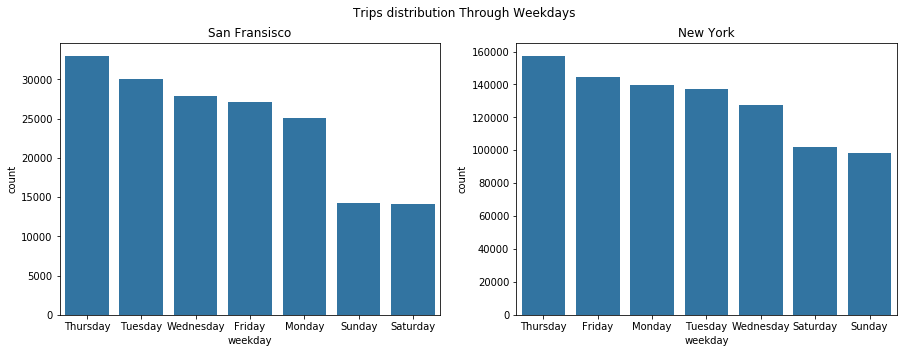

In [22]:
fig, ax =plt.subplots(1,2,sharex="none",figsize=(15,5))
col=sb.color_palette()[0]
order1=["Thursday","Tuesday","Wednesday","Friday","Monday","Sunday","Saturday"]
sb.countplot(result[result["state"]=="San Fransisco"]['weekday'], ax=ax[0],color=col,order=order1)

order2=["Thursday","Friday","Monday","Tuesday","Wednesday","Saturday","Sunday"]
sb.countplot(result[result["state"]=="New York"]['weekday'], ax=ax[1],color=col,order=order2)
fig.suptitle('Trips distribution Through Weekdays')

ax[0].set_title("San Fransisco")
ax[1].set_title("New York");

As we can See in the 2 bar chart :
    
    for San fransisco the ascending order of most trips are  Thursday,Tuseday,Wednesday,Friday,Monday,Sunday,Saturday
    
    for New York the ascending order of most trips are  Thursday,Friday,Monday,Tuseday,Wednesday,Saturday,Sunday


# distribution of hour through day

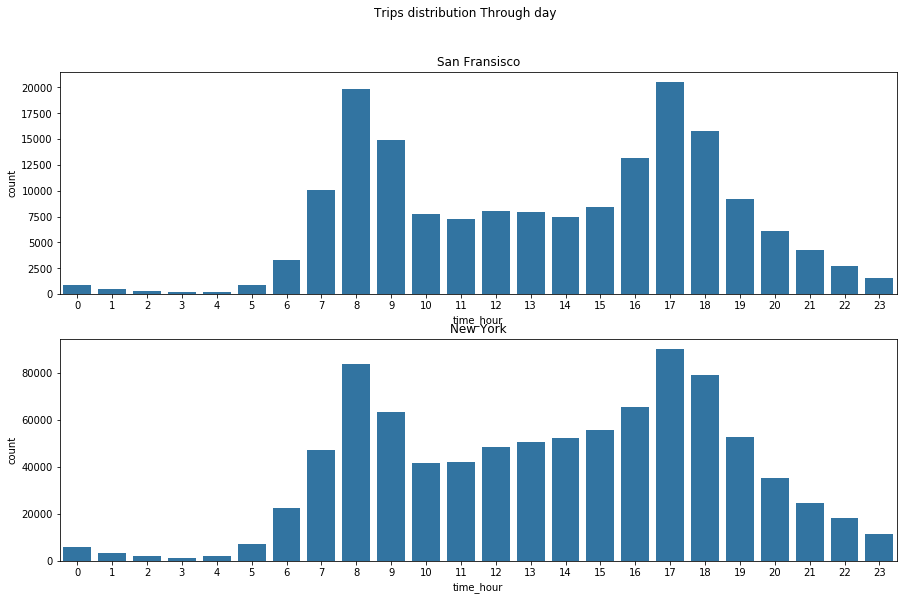

In [23]:
fig, ax =plt.subplots(2,1,sharex="none",figsize=(15,9));col=sb.color_palette()[0]
sb.countplot(result[result["state"]=="San Fransisco"]['time_hour'], ax=ax[0],color=col);
sb.countplot(result[result["state"]=="New York"]['time_hour'], ax=ax[1],color=col)
fig.suptitle('Trips distribution Through day');ax[0].set_title("San Fransisco");ax[1].set_title("New York");

for San Fransisco and New York Most trips in term of time of the day at hour (8 and 17) 

for San Fransisco and New York Least trips through the day at hour (2,3,4) 


# distribution of member_birth_year

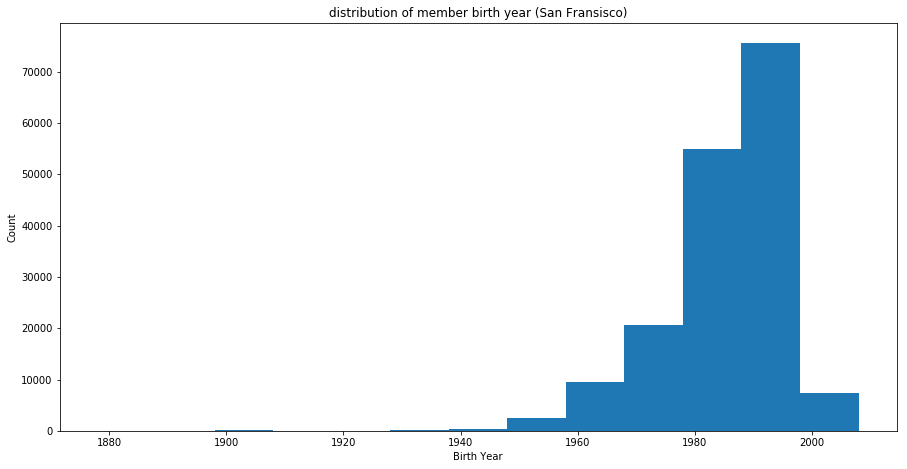

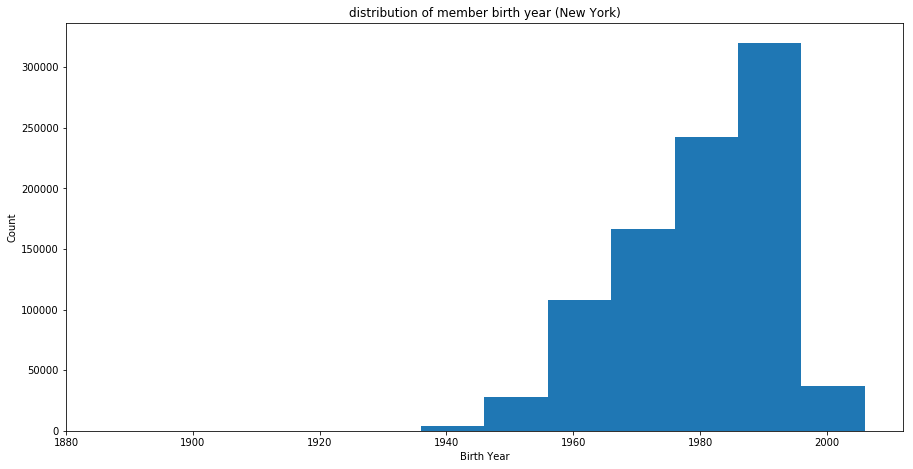

In [24]:
plt.figure(figsize=(15,7.5))
bins1=np.arange(result[result["state"]=="San Fransisco"]["member_birth_year"].min(),result[result["state"]=="San Fransisco"]["member_birth_year"].max()+10,10)
plt.hist(data= result[result["state"]=="San Fransisco"], x="member_birth_year",bins=bins1);
plt.title("distribution of member birth year (San Fransisco)");
plt.xlabel("Birth Year")
plt.ylabel("Count");

plt.figure(figsize=(15,7.5))
bins2=np.arange(result[result["state"]=="New York"]["member_birth_year"].min(),result[result["state"]=="New York"]["member_birth_year"].max()+10,10)
plt.hist(data= result[result["state"]=="New York"], x="member_birth_year",bins=bins2);
plt.title("distribution of member birth year (New York)");
plt.xlabel("Birth Year")
plt.ylabel("Count");

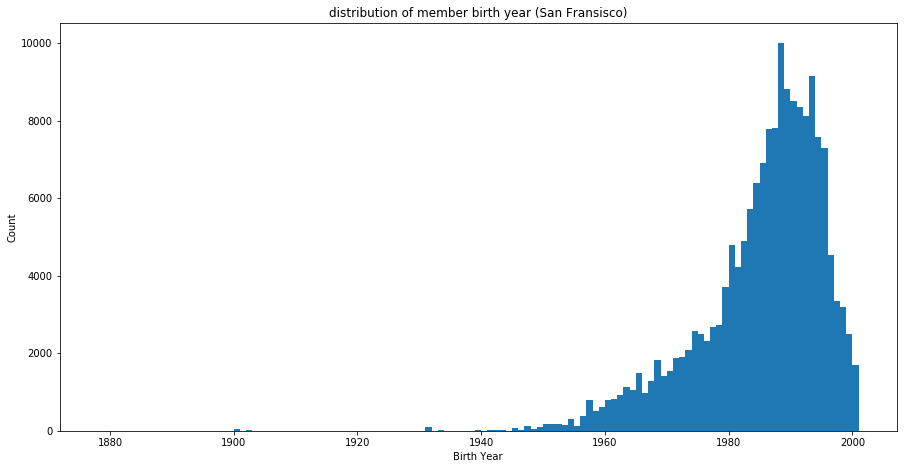

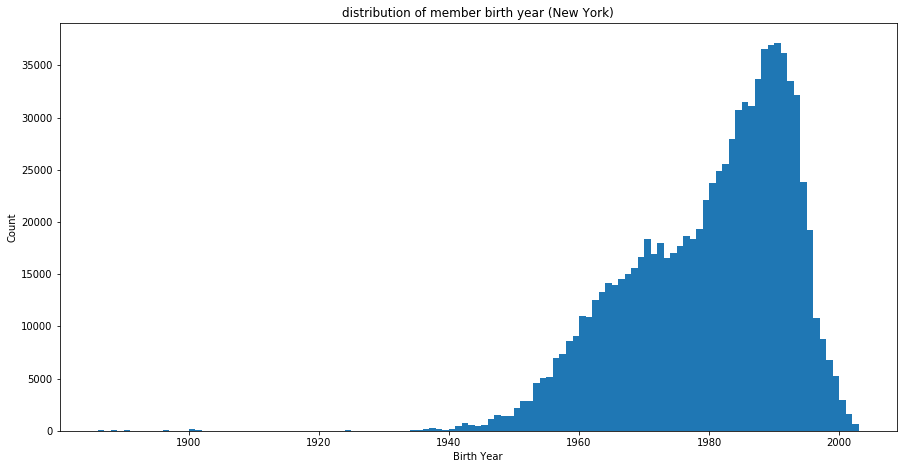

In [25]:
# I will take smaller bins to show deeper look
plt.figure(figsize=(15,7.5))
bins1=np.arange(result[result["state"]=="San Fransisco"]["member_birth_year"].min(),result[result["state"]=="San Fransisco"]["member_birth_year"].max()+1,1)
plt.hist(data= result[result["state"]=="San Fransisco"], x="member_birth_year",bins=bins1);
plt.title("distribution of member birth year (San Fransisco)");
plt.xlabel("Birth Year")
plt.ylabel("Count");

plt.figure(figsize=(15,7.5))
bins2=np.arange(result[result["state"]=="New York"]["member_birth_year"].min(),result[result["state"]=="New York"]["member_birth_year"].max()+1,1)
plt.hist(data= result[result["state"]=="New York"], x="member_birth_year",bins=bins2);
plt.title("distribution of member birth year (New York)");
plt.xlabel("Birth Year")
plt.ylabel("Count");

In [26]:
##there are some outliers in the two datasets

print(result[result["state"]=="San Fransisco"].member_birth_year.quantile(0.03))
print(result[result["state"]=="New York"].member_birth_year.quantile(0.03))

1961.0
1954.0


I will focus only on member_birth_year greater than 1961 in San Fransisco 
and member_birth_year greater than 1954 in New york

In [27]:
df_san_frans=df_san_frans[df_san_frans["member_birth_year"]>1961.0]
df_new_york=df_new_york[df_new_york["member_birth_year"]>1954.0]

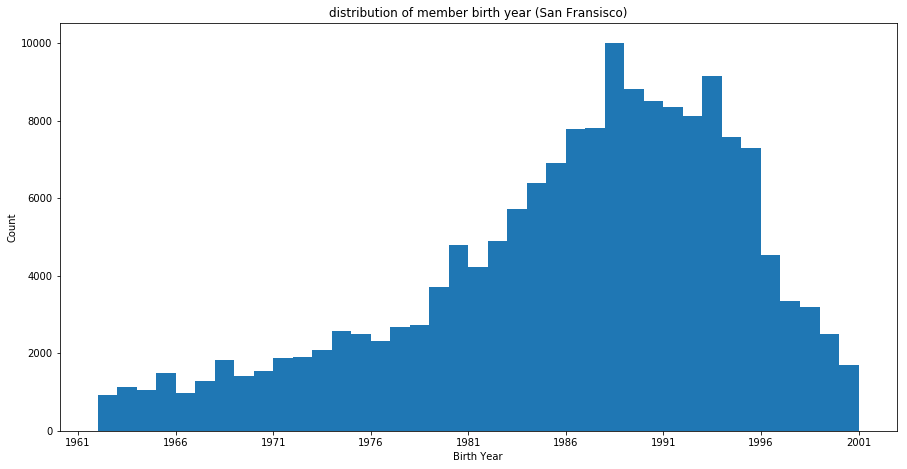

In [28]:
plt.figure(figsize=(15,7.5))
bins1=np.arange(df_san_frans["member_birth_year"].min(),df_san_frans["member_birth_year"].max()+1,1)
plt.hist(data= df_san_frans, x="member_birth_year",bins=bins1);
plt.title("distribution of member birth year (San Fransisco)");
plt.xticks(np.arange(1961,2001+5,5))
plt.xlabel("Birth Year")
plt.ylabel("Count");

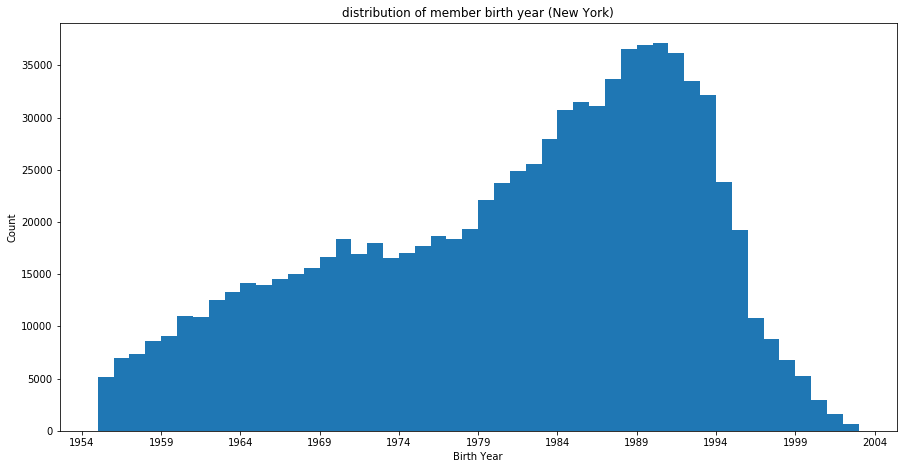

In [29]:
plt.figure(figsize=(15,7.5))
bins2=np.arange(df_new_york["member_birth_year"].min(),df_new_york["member_birth_year"].max()+1,1)
plt.hist(data= df_new_york, x="member_birth_year",bins=bins2);
plt.title("distribution of member birth year (New York)");
plt.xticks(np.arange(1954,2003+5,5))

plt.xlabel("Birth Year")
plt.ylabel("Count");

For San Fransisco the distribution has more slope than New york, San Fransisco has peak between 1988 -1994 and there is a steep drop after 1996.

For New York the distribution has peak between years (1986 and 1993) and there are a steep drop after 1994 

# distribution of duration_Sec

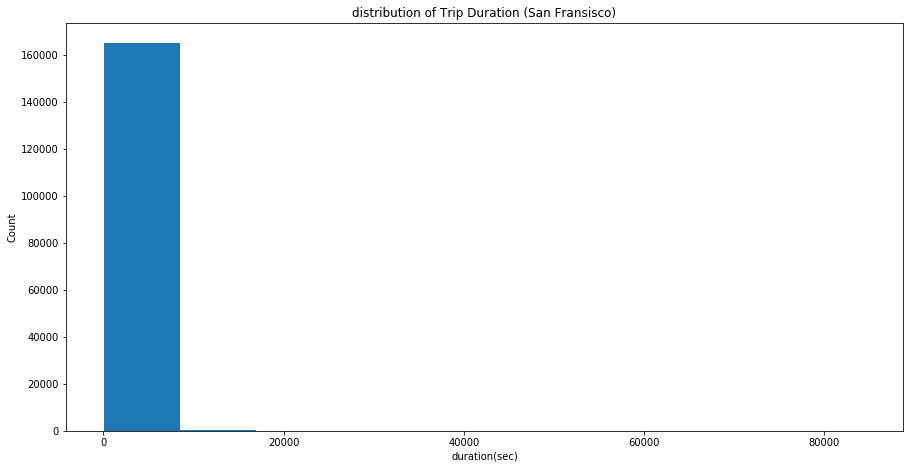

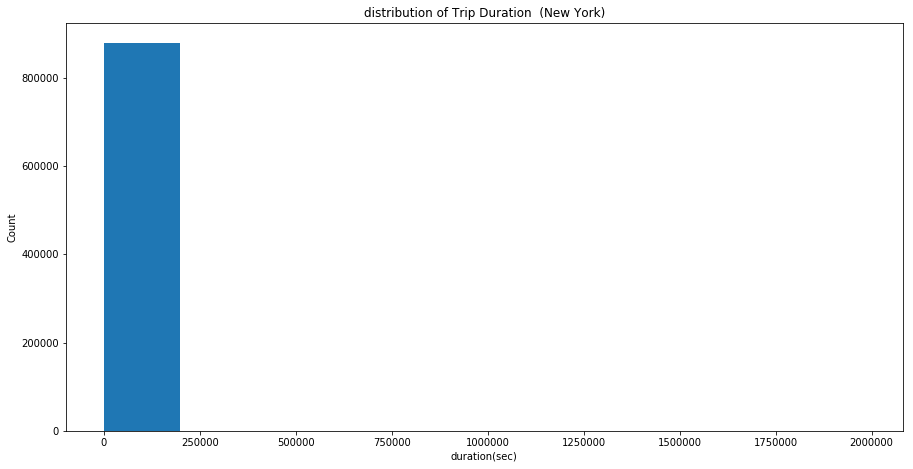

In [30]:
plt.figure(figsize=(15,7.5))
plt.hist(data= df_san_frans, x="duration_sec");
plt.title("distribution of Trip Duration (San Fransisco)");
plt.xlabel("duration(sec)")
plt.ylabel("Count");

plt.figure(figsize=(15,7.5))
plt.hist(data= df_new_york, x="duration_sec");
plt.title("distribution of Trip Duration  (New York)");

plt.xlabel("duration(sec)")
plt.ylabel("Count");

In [31]:
#It seems there are some outliers in the column of Trip Duration so I will reomve about 3% of the data and replot the graph

print(df_san_frans["duration_sec"].quantile(0.97))
print(df_new_york["duration_sec"].quantile(0.97))

1878.3299999999872
2121.0


In [32]:
df_san_frans=df_san_frans[df_san_frans["duration_sec"]<=1888]
df_new_york=df_new_york[df_new_york["duration_sec"]<=2121]

In [33]:
#I will ignore also the trips whose duration equal or smaller than 10 sec

df_san_frans=df_san_frans[df_san_frans["duration_sec"]>10]
df_new_york=df_new_york[df_new_york["duration_sec"]>10]

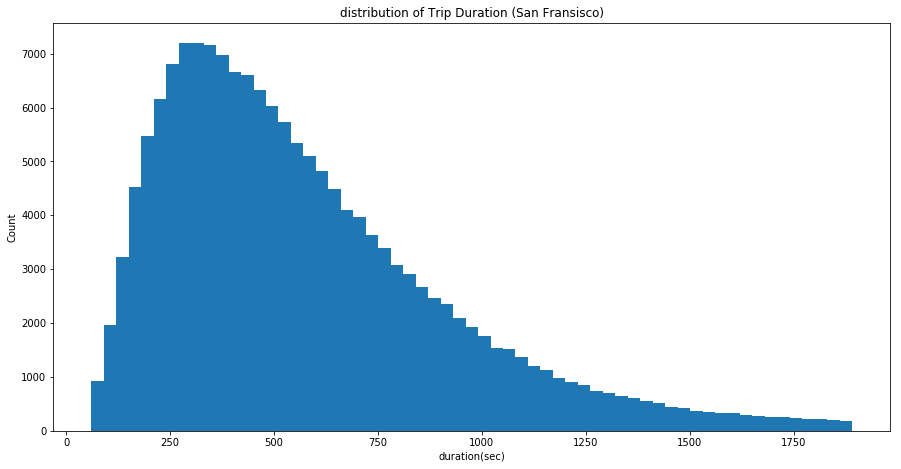

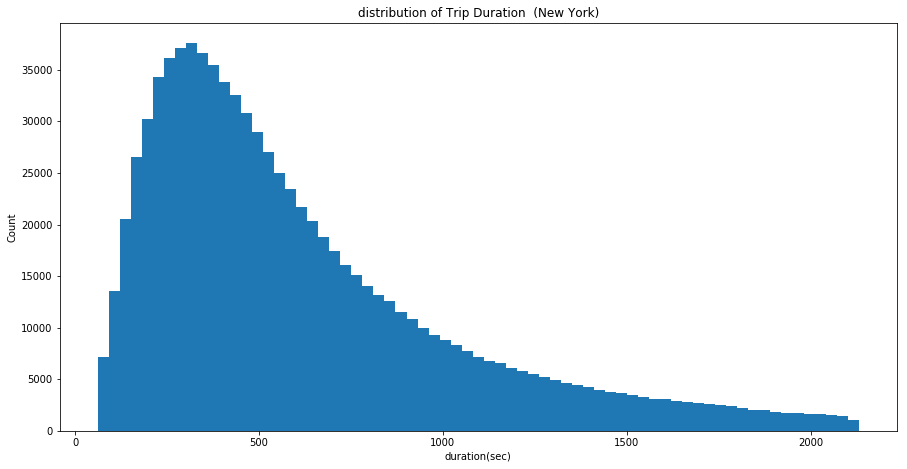

In [34]:
plt.figure(figsize=(15,7.5))
binsize=30
bin1=np.arange(df_san_frans["duration_sec"].min(),df_san_frans["duration_sec"].max()+30,binsize)
plt.hist(data= df_san_frans, x="duration_sec",bins=bin1);
plt.title("distribution of Trip Duration (San Fransisco)");
plt.xlabel("duration(sec)")
plt.ylabel("Count");

plt.figure(figsize=(15,7.5))
bin2=np.arange(df_new_york["duration_sec"].min(),df_new_york["duration_sec"].max()+30,binsize)
plt.hist(data= df_new_york, x="duration_sec",bins=bin2);
plt.title("distribution of Trip Duration  (New York)");
plt.xlabel("duration(sec)")
plt.ylabel("Count");

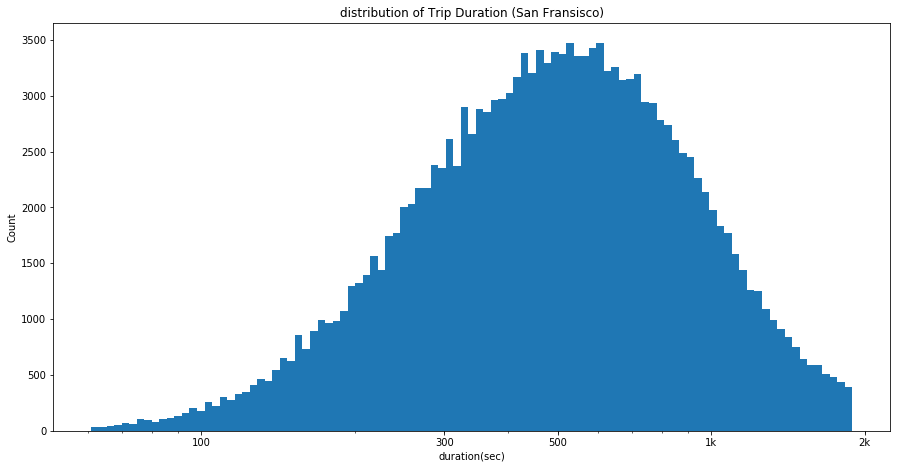

In [35]:
# there's a long tail in the distribution, so let's put it on a log scale instead
plt.figure(figsize=(15,7.5))
log_bsize=0.01477
bin1=10** np.arange(np.log10(df_san_frans["duration_sec"].min()),np.log10(df_san_frans["duration_sec"].max())+log_bsize,log_bsize)
plt.hist(data= df_san_frans, x="duration_sec",bins=bin1);
plt.xscale('log')
plt.xticks([100,300,500, 1e3, 2e3], [100,300,500, '1k', '2k'])
plt.title("distribution of Trip Duration (San Fransisco)");
plt.xlabel("duration(sec)")
plt.ylabel("Count");

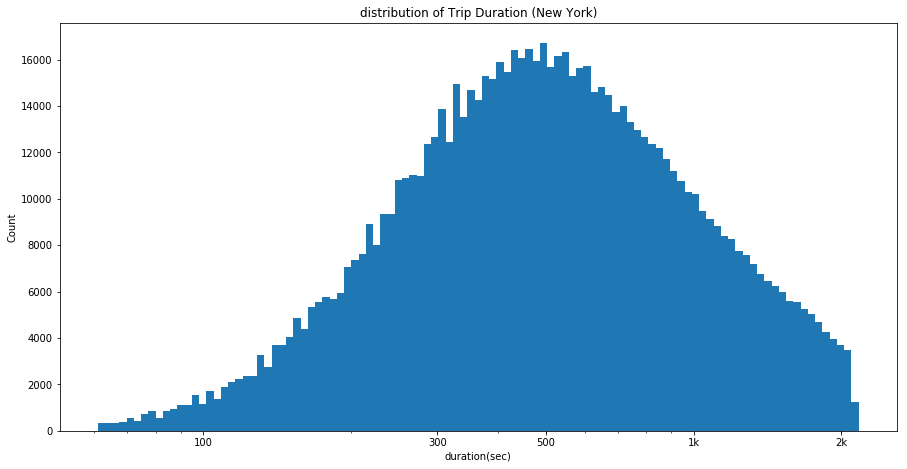

In [36]:
plt.figure(figsize=(15,7.5))
log_bsize =0.01477
bin1=10** np.arange(np.log10(df_new_york["duration_sec"].min()),np.log10(df_new_york["duration_sec"].max())+log_bsize,log_bsize)
plt.hist(data= df_new_york, x="duration_sec",bins=bin1);
plt.xscale('log')
plt.xticks([100,300,500, 1e3, 2e3], [100,300,500, '1k', '2k'])
plt.title("distribution of Trip Duration (New York)");
plt.xlabel("duration(sec)")
plt.ylabel("Count");

The distribution of trip duration for san fransisco has peak values in range of (400-700)sec and the curve has more steep slope 
than new york.
New york has  peak values in range of(400-600) but the slope or drop of  the curve on the two sides is
lighter than san fransisco


# distribution of user_type

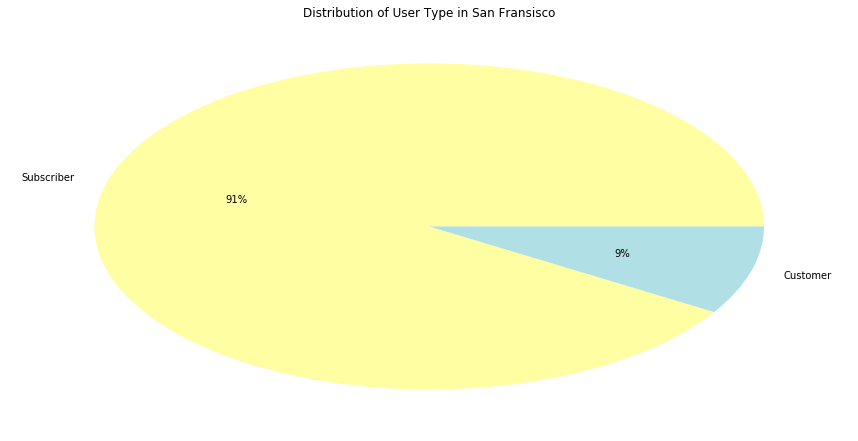

In [37]:
IAP = df_san_frans['user_type'].value_counts().to_frame().T
plt.figure(figsize=(15,7.5))
colors = sb.color_palette('pastel')[4:6]
mylabels = ["Subscriber", "Customer"]
plt.pie(IAP.iloc[0],labels = mylabels,colors=colors,startangle = 360,autopct='%.0f%%');
plt.title("Distribution of User Type in San Fransisco");

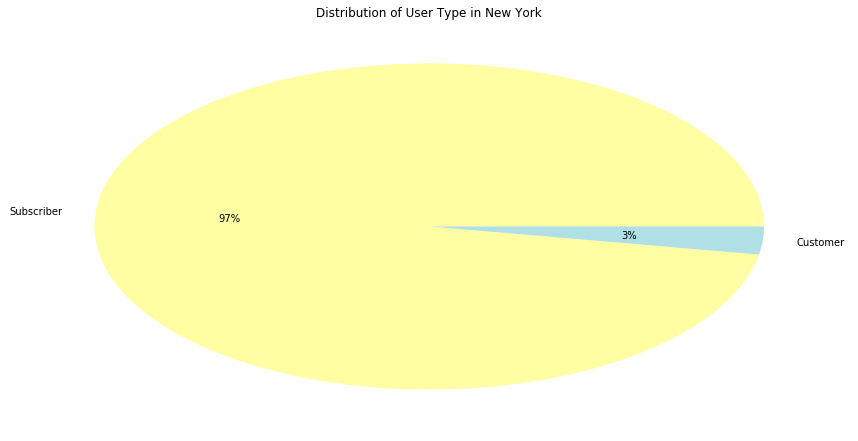

In [38]:
AP = df_new_york['user_type'].value_counts().to_frame().T
plt.figure(figsize=(15,7.5))
colors = sb.color_palette('pastel')[4:6]
mylabels = ["Subscriber", "Customer"]
plt.pie(AP.iloc[0],labels = mylabels,colors=colors,startangle = 360,autopct='%.0f%%');
plt.title("Distribution of User Type in New York");

For San Fransisco the usere are 91% Subscriber and 9% Customer
For New York the usere are 97% Subscriber and 3% Customer

# distribution of member_gender

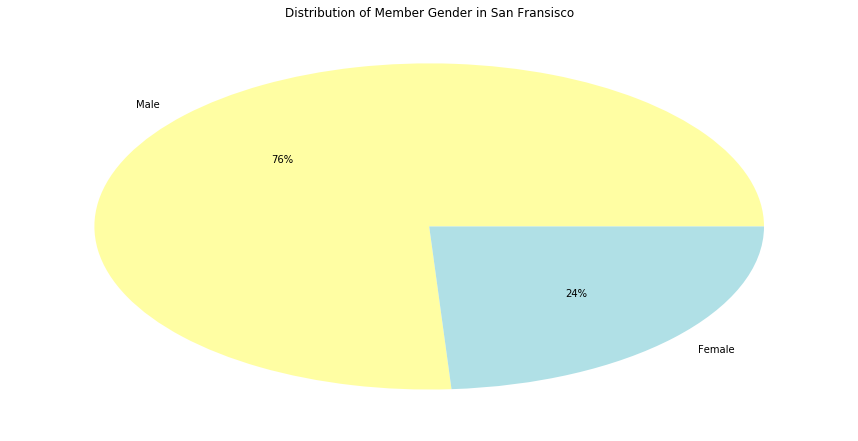

In [39]:
I = df_san_frans['member_gender'].value_counts().to_frame().T
plt.figure(figsize=(15,7.5))
colors = sb.color_palette('pastel')[4:6]
mylabels = ["Male", "Female"]
plt.pie(I.iloc[0],labels = mylabels,colors=colors,startangle = 360,autopct='%.0f%%');
plt.title("Distribution of Member Gender in San Fransisco");

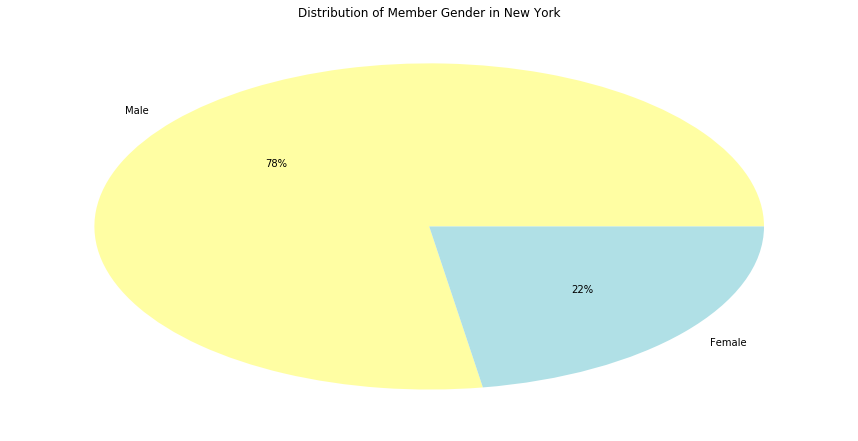

In [40]:
A = df_new_york['member_gender'].value_counts().to_frame().T
plt.figure(figsize=(15,7.5))
colors = sb.color_palette('pastel')[4:6]
mylabels = ["Male", "Female"]
plt.pie(A.iloc[0],labels = mylabels,colors=colors,startangle = 360,autopct='%.0f%%');
plt.title("Distribution of Member Gender in New York");

For San Fransisco the usere are 76% Male and 24% Female
For New York the usere are 78% Male and 22% Female

# time_hour VS duration_sec


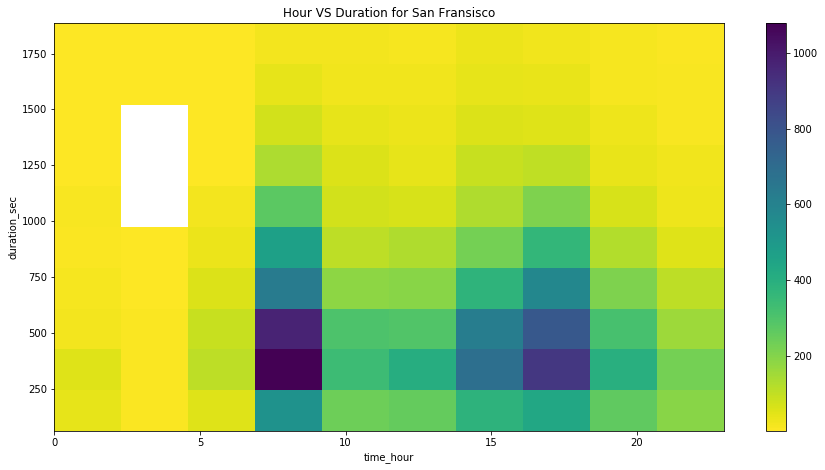

In [41]:
samples1 =df_san_frans.sample(frac=0.1)
plt.figure(figsize=(15,7.5))
plt.hist2d(data=samples1,x="time_hour",y="duration_sec",cmin=0.5,cmap='viridis_r')
plt.colorbar()
plt.title("Hour VS Duration for San Fransisco")
plt.xlabel("time_hour")
plt.ylabel("duration_sec");


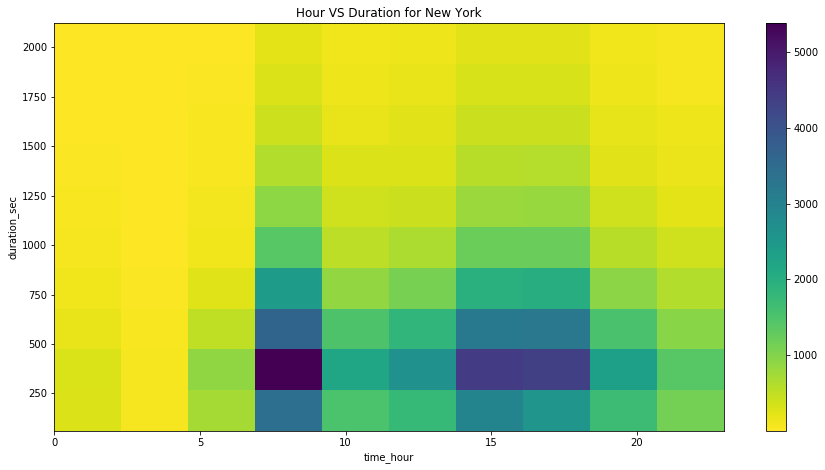

In [42]:
samples2 =df_new_york.sample(frac=0.1)
plt.figure(figsize=(15,7.5))
plt.hist2d(data=samples2,x="time_hour",y="duration_sec",cmin=0.5,cmap='viridis_r')
plt.colorbar()
plt.title("Hour VS Duration for New York")
plt.xlabel("time_hour")
plt.ylabel("duration_sec");

 as we can see in the two charts for San Fransisco and New york the most frequent trips occur in morning at 7 to 9 and 16 to 18 and their duration 
are mostly near to 500 sec

# Relation between Weekdays VS Duration of trips(sec)

I will plot a relation between duration_sec and weekday for san Fransisco and New York.

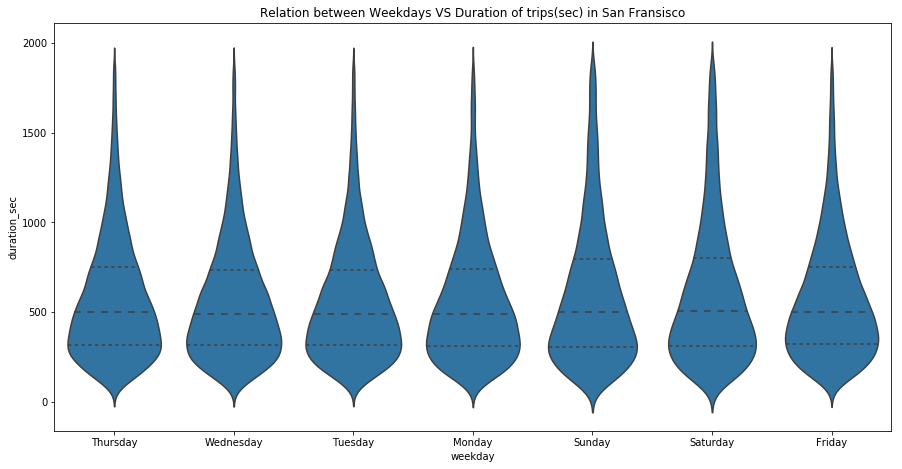

In [43]:
plt.figure(figsize=(15,7.5));
col=sb.color_palette()[0]
sb.violinplot(x="weekday", y="duration_sec", data=df_san_frans,color=col,inner='quartile')
plt.title("Relation between Weekdays VS Duration of trips(sec) in San Fransisco");

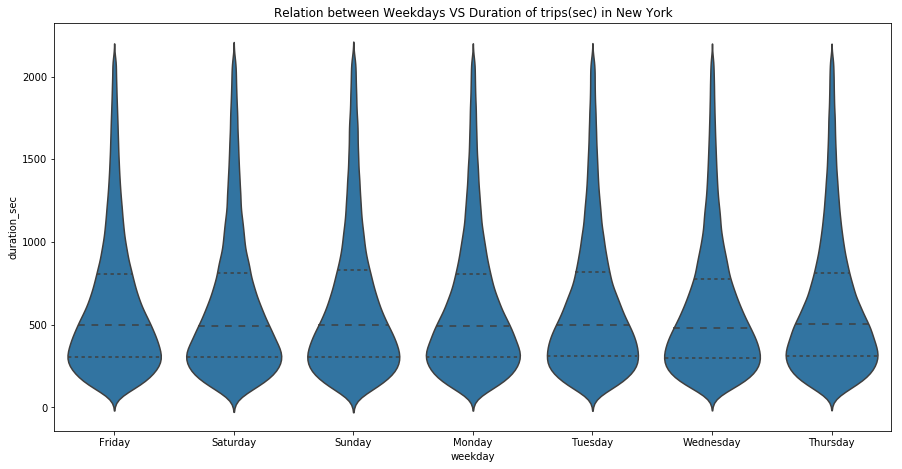

In [44]:
plt.figure(figsize=(15,7.5));
col=sb.color_palette()[0]
sb.violinplot(x="weekday", y="duration_sec", data=df_new_york,color=col,inner='quartile')
plt.title("Relation between Weekdays VS Duration of trips(sec) in New York");

For San Fransisco the most trips takes 500 sec and 1st quartile at 300 sec , 2nd at 500 sec and 3rd at 700-800 sec
the distribution of trips is nearly the same through all weekdays.For New York the most trips through the day take about 300 sec ,1st quartile at 300 sec
2nd quartile at 500 sec and 3rd at 700-800 sec.
The distribution of trip duration through the day is the nearly the same at all weekdays 


# Relation between trip duration and weekday for each user_type

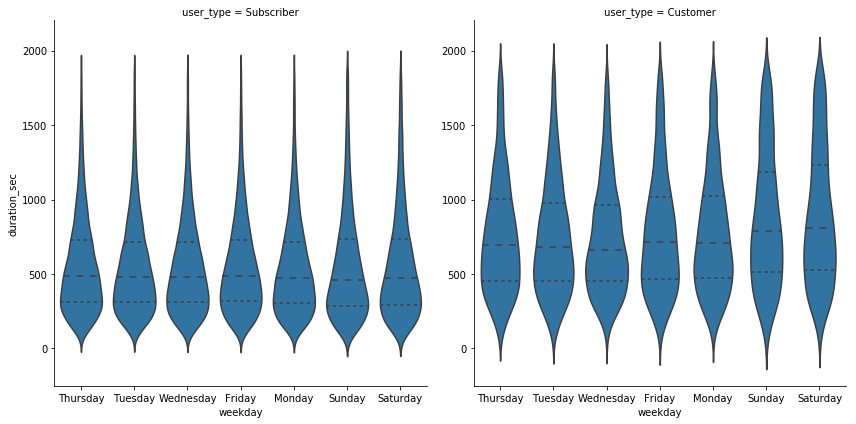

In [45]:
g = sb.FacetGrid(data = df_san_frans, col = 'user_type', size = 6)
order1=["Thursday","Tuesday","Wednesday","Friday","Monday","Sunday","Saturday"]
g.map(sb.violinplot, 'weekday', 'duration_sec',inner='quartile',order=order1);


For San Fransisco
For subscribers 1st quartile at 300 sec , 2nd quartile at 500 sec , 3 quartile at 750 sec 
               and the most trips takes nearly 300 sec

For customers  1st quartile at 450 sec, 2nd quartile at 700 sec and 3rd quartile at 1000 sec
                 and the most trips takes nearly 500 sec

in general the customer trips takes more time than subscriber trips

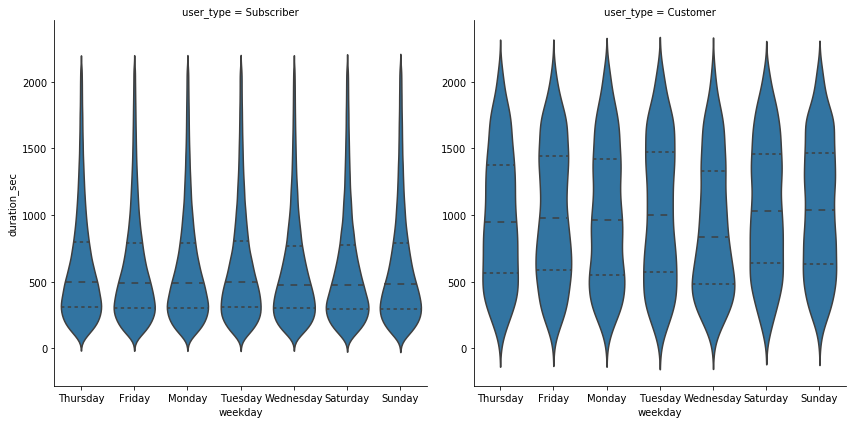

In [46]:
g = sb.FacetGrid(data = df_new_york, col = 'user_type', size = 6)
order2=["Thursday","Friday","Monday","Tuesday","Wednesday","Saturday","Sunday"]
g.map(sb.violinplot, 'weekday', 'duration_sec',inner='quartile',order=order2);

in New York
For subscribers 1st quartile at 300 sec , 2nd quartile at 500 sec , 3 quartile at 800 sec
                 and the most trips takes nearly 300 sec

For customers  1st quartile at 450 sec, 2nd quartile at 700 sec and 3rd quartile at 1000 sec
                 and the most trips takes nearly 500 sec for all weekdays except saturday and sunday (500-1000)sec


in general the customer trips takes more time than subscriber trips